In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [2]:
df=pd.read_csv('DiamondPricesData.csv')
df.head(6)

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
5,336,0.24,Very Good,J,VVS2,NaN,57.0,3.94,3.96,2.48


In [3]:
df.isnull().sum()

price       0
carat       0
cut         0
color       6
clarity     0
depth      14
table       0
x           0
y           0
z           0
dtype: int64

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=df.fillna(method='bfill')
df.isnull().sum()

price      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [6]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
contdata=['price','carat','depth','table','x','y','z']
catdata=['cut','color','clarity']

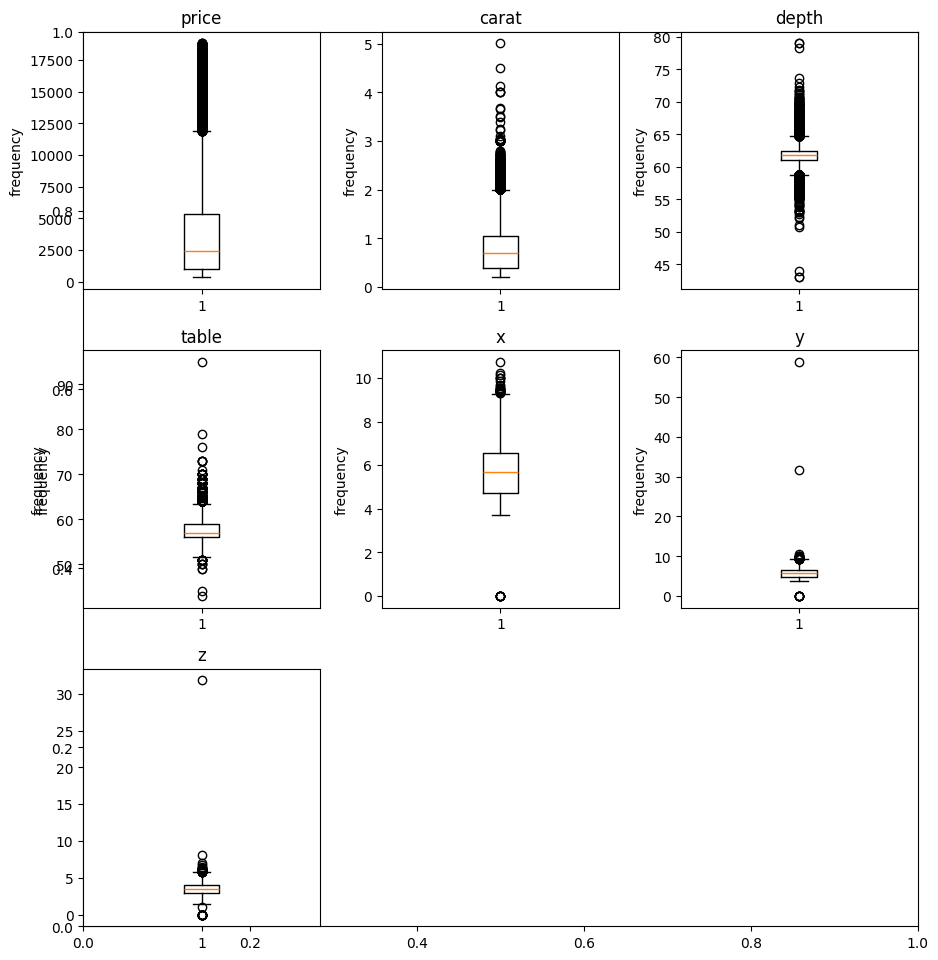

In [8]:
contdata=df.select_dtypes(exclude=('object'))
plt.figure(figsize=(10,10))
for i,col in enumerate(contdata.columns):
    plt.ylabel(f'frequency')
    plt.subplot(3,3,i+1)
    plt.boxplot(contdata[col])
    plt.title(col)
plt.tight_layout()
plt.show()    

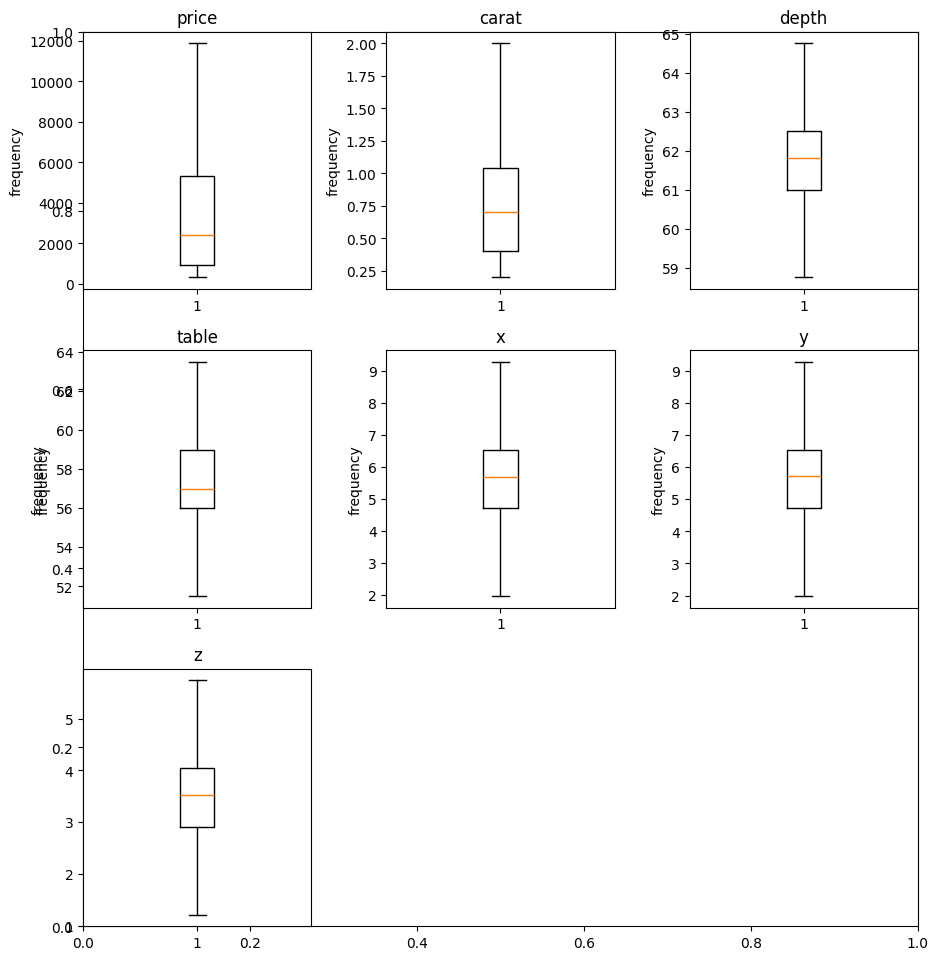

In [9]:
def remove_outliers(df,columnstoclean):
    for column in columnstoclean:
        q1=df[column].quantile(.25)
        q3=df[column].quantile(.75)
        iqr=q3-q1
        lowerbound=q1-iqr*1.5
        upperbound=q3+iqr*1.5
        df[column]=np.where(df[column]<lowerbound,lowerbound,df[column])
        
        df[column]=np.where(df[column]>upperbound,upperbound,df[column])
    return df

columnstoclean=['price','carat','depth','table','x','y','z'] 
clean=remove_outliers(df=contdata,columnstoclean=columnstoclean)
clean   

plt.figure(figsize=(10,10))
for i,col in enumerate(clean.columns):
    plt.ylabel(f'frequency')
    plt.subplot(3,3,i+1)
    plt.boxplot(clean[col])
    plt.title(col)
plt.tight_layout()
plt.show()    
        
        

In [14]:
clean=clean.select_dtypes(exclude='object')
corr_matrix=clean.corr()
corr_matrix

,price,carat,depth,table,x,y,z
price,1.000000,0.921591,-0.010697,0.127134,0.884435,0.865421,0.861249
carat,0.921591,1.000000,0.028186,0.181618,0.975094,0.951722,0.953387
depth,-0.010697,0.028186,1.000000,-0.295445,-0.025292,-0.029340,0.094888
table,0.127134,0.181618,-0.295445,1.000000,0.195344,0.183760,0.150929
x,0.884435,0.975094,-0.025292,0.195344,1.000000,0.974701,0.970772
y,0.865421,0.951722,-0.029340,0.183760,0.974701,1.000000,0.952006
z,0.861249,0.953387,0.094888,0.150929,0.970772,0.952006,1.000000


In [15]:
import scipy.stats

In [23]:
def anovatest(inpdata,target_variable,catpred):
    from scipy.stats import f_oneway
    selectedpredictors=[]
    
    for predictors in catpred:
        grouplist=inpdata.groupby(predictors)[target_variable].apply (list)
        anovares=f_oneway(*grouplist)
    if anovares[1]<0.05:
        print(predictors, 'is correlated with', target_variable, 'p-value', anovares[1])
        selectedpredictors.append(predictors)
    else:
        print(predictors, 'is not correlated with', target_variable, 'p-value', anovares[1])
        selectedpredictors.append(predictors)
    return selectedpredictors

In [24]:
catpred=['cut','color','clarity']
anovatest(inpdata=df,target_variable='price',catpred=catpred)

clarity is correlated with price p-value 1.9190895e-316


['clarity']